In [113]:
import numpy as np
import pandas as pd
import seaborn as sb

## Создание данных

In [114]:
input_data = {
    'Хлеб черный': np.random.normal(200, 5, 12),
    'Хлеб белый': np.random.normal(200, 10, 12),
    'Чай черный': np.random.normal(185, 8, 12),
    'Чай зеленый': np.random.normal(135, 5, 12),
    'Шоколад': np.random.normal(100, 5, 12),
    'Зефир': np.random.normal(120, 8, 12),
    'Кофе': np.random.normal(150, 5, 12),
    'Конфеты': np.random.normal(175, 10, 12),
    'Корм для котов': np.random.normal(180, 15, 12),
    'Вафли': np.random.normal(115, 8, 12),
}

In [115]:
dataFrame = pd.DataFrame(input_data)
dataFrame

,Хлеб черный,Хлеб белый,Чай черный,Чай зеленый,Шоколад,Зефир,Кофе,Конфеты,Корм для котов,Вафли
0,205.429191,193.367650,160.767363,141.956082,106.472670,140.776385,148.835215,183.569873,173.456821,125.317394
1,194.506797,190.133561,186.118433,136.087868,103.231337,115.697107,148.484748,203.177669,167.057990,120.524477
2,196.758885,212.435281,190.442735,136.943244,84.930401,127.164914,152.842627,162.497705,158.861979,116.154575
3,204.505951,211.486902,178.842638,130.616344,100.846369,129.998950,142.693845,172.966223,176.700121,110.916353
4,195.615854,190.189593,193.737063,135.300294,103.366260,126.178926,159.430614,173.269291,185.154325,120.977461
5,190.496279,190.539886,189.014211,133.471239,103.876211,127.804144,162.764282,178.223779,207.955666,118.177614
6,197.076813,191.528343,189.300888,140.087955,102.839398,125.050746,145.076314,175.212790,168.732272,126.337672
7,202.628125,202.266250,191.012350,135.500040,96.112581,128.836065,142.134074,192.723604,181.268679,114.111191
8,202.510113,201.513609,185.267620,132.459546,108.966152,134.224876,155.635829,177.423127,162.587954,108.588938
9,205.352583,193.696520,185.781140,138.119932,104.556395,126.257246,144.561867,172.725118,194.139502,123.829776


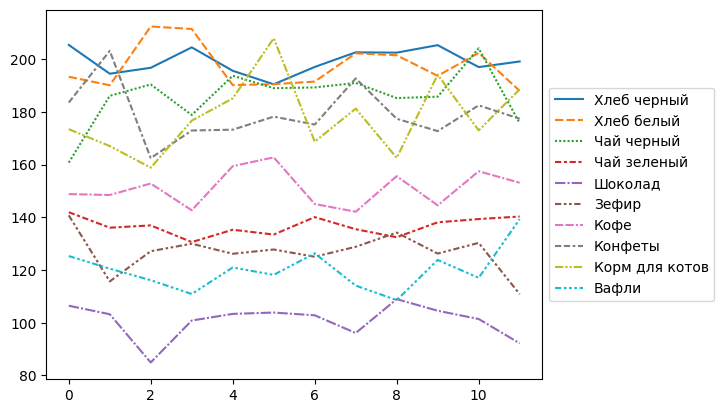

In [116]:
plot = sb.lineplot(dataFrame)
sb.move_legend(plot, "center left", bbox_to_anchor=(1, 0.5))

## Поиск основных величин для прогнозирования продаж

In [117]:
p0 = dataFrame.sum()/dataFrame.shape[0]
p0

Хлеб черный       199.255174
Хлеб белый        197.297325
Чай черный        185.846939
Чай зеленый       136.684099
Шоколад           100.736650
Зефир             126.931179
Кофе              151.090137
Конфеты           179.309539
Корм для котов    178.126413
Вафли             120.108248
dtype: float64

In [118]:
sdq = ((dataFrame - p0)**2).sum()/(dataFrame.shape[0]-1)
sdq

Хлеб черный        23.030254
Хлеб белый         72.265795
Чай черный        113.411305
Чай зеленый        11.860626
Шоколад            44.271873
Зефир              59.898733
Кофе               46.921065
Конфеты           109.622738
Корм для котов    198.962638
Вафли              66.508940
dtype: float64

In [119]:
x_pred = p0 + np.random.normal(0, sdq, len(p0))
pd.concat([dataFrame, pd.DataFrame([x_pred], columns=x_pred.index)]).reset_index(drop=True)

,Хлеб черный,Хлеб белый,Чай черный,Чай зеленый,Шоколад,Зефир,Кофе,Конфеты,Корм для котов,Вафли
0,205.429191,193.367650,160.767363,141.956082,106.472670,140.776385,148.835215,183.569873,173.456821,125.317394
1,194.506797,190.133561,186.118433,136.087868,103.231337,115.697107,148.484748,203.177669,167.057990,120.524477
2,196.758885,212.435281,190.442735,136.943244,84.930401,127.164914,152.842627,162.497705,158.861979,116.154575
3,204.505951,211.486902,178.842638,130.616344,100.846369,129.998950,142.693845,172.966223,176.700121,110.916353
4,195.615854,190.189593,193.737063,135.300294,103.366260,126.178926,159.430614,173.269291,185.154325,120.977461
5,190.496279,190.539886,189.014211,133.471239,103.876211,127.804144,162.764282,178.223779,207.955666,118.177614
6,197.076813,191.528343,189.300888,140.087955,102.839398,125.050746,145.076314,175.212790,168.732272,126.337672
7,202.628125,202.266250,191.012350,135.500040,96.112581,128.836065,142.134074,192.723604,181.268679,114.111191
8,202.510113,201.513609,185.267620,132.459546,108.966152,134.224876,155.635829,177.423127,162.587954,108.588938
9,205.352583,193.696520,185.781140,138.119932,104.556395,126.257246,144.561867,172.725118,194.139502,123.829776


## Проверка полученных результатов на основе условий

In [120]:
rel = sdq / p0
rel

Хлеб черный       0.115582
Хлеб белый        0.366279
Чай черный        0.610240
Чай зеленый       0.086774
Шоколад           0.439481
Зефир             0.471899
Кофе              0.310550
Конфеты           0.611360
Корм для котов    1.116974
Вафли             0.553742
dtype: float64

In [121]:
Condition_1 = ((dataFrame - p0) < 2 * sdq).all()
Condition_2 = (p0 > 2 * sdq)
Condition_3 = (dataFrame > 0).all()
Product_color = pd.Series(dtype='string')
for nameProduct in dataFrame.columns:
    if (not Condition_3[nameProduct]):
        Product_color[nameProduct] = 'Красный'
    elif (not Condition_1[nameProduct] and not Condition_2[nameProduct]):
        Product_color[nameProduct] = 'Оранжевый'
    elif (not Condition_1[nameProduct] or not Condition_2[nameProduct]):
        Product_color[nameProduct] = 'Желтый'
    else:
        Product_color[nameProduct] = 'Зеленый'
df_result = {
    'Оценка':rel,
    'Условие№1':Condition_1,
    'Условие№2':Condition_2,
    'Условие№3':Condition_3,
    'Цвет':Product_color
}
df_result = pd.DataFrame(data=df_result)
df_result

,Оценка,Условие№1,Условие№2,Условие№3,Цвет
Хлеб черный,0.115582,True,True,True,Зеленый
Хлеб белый,0.366279,True,True,True,Зеленый
Чай черный,0.610240,True,False,True,Желтый
Чай зеленый,0.086774,True,True,True,Зеленый
Шоколад,0.439481,True,True,True,Зеленый
Зефир,0.471899,True,True,True,Зеленый
Кофе,0.310550,True,True,True,Зеленый
Конфеты,0.611360,True,False,True,Желтый
Корм для котов,1.116974,True,False,True,Желтый
Вафли,0.553742,True,False,True,Желтый
